/tmp/ipykernel_24467/3715143559.py:42: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.append(QFT(n_count, inverse=True, do_swaps=True), range(n_count))


QPE Circuit for T-Gate (Theta = 1/8):


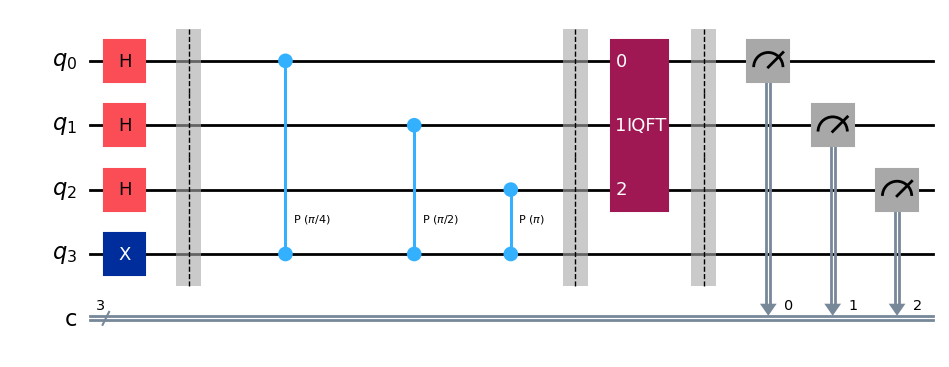


Measured Counts:
{'001': 1000}

Most likely binary: 001
Decimal Value: 1
Estimated Phase: 1/8 = 0.125
Actual Phase:    1/8   = 0.125


In [1]:
# --- Day 14: Quantum Phase Estimation (QPE) ---
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

# 1. Setup the Experiment
# We want to measure the phase of a T-gate (1/8 turn).
# We need "Counting Qubits" to store the precision.
n_count = 3  # 3 bits of precision
qc = QuantumCircuit(n_count + 1, n_count) # +1 for the target qubit

# 2. Prepare the Circuit
# A. Initialize Counting Qubits to Superposition
for i in range(n_count):
    qc.h(i)

# B. Prepare Target Qubit
# The target must be an eigenstate of the Unitary.
# For T-gate (Z-rotation), |1> is an eigenstate.
qc.x(n_count) 

qc.barrier()

# 3. The Probing (Controlled-Unitary Ops)
# We apply the gate U (T-gate) with increasing powers: U^1, U^2, U^4...
# This is the "Phase Kickback" magic.
phase_angle = np.pi / 4 # T-gate angle (1/8 of 2pi)

# Repetitions = 2^0, 2^1, 2^2...
for i in range(n_count):
    repetitions = 2**i
    # We apply a Controlled-Phase (CP) gate
    qc.cp(phase_angle * repetitions, i, n_count)

qc.barrier()

# 4. The Decoding (Inverse QFT)
# We read the kicked-back phases and turn them into a binary integer.
# Note: We must swap the bits (do_swaps=True) to get the right order.
qc.append(QFT(n_count, inverse=True, do_swaps=True), range(n_count))

qc.barrier()

# 5. Measure the Counting Qubits
for i in range(n_count):
    qc.measure(i, i)

# 6. Draw
print("QPE Circuit for T-Gate (Theta = 1/8):")
display(qc.draw(output='mpl'))

# 7. Simulate
sim = AerSimulator()
qc_t = transpile(qc, sim)
counts = sim.run(qc_t, shots=1000).result().get_counts()

# 8. Analyze
print("\nMeasured Counts:")
print(counts)

# Convert binary result to decimal phase
# The most probable result (e.g., '001') is the integer X.
# The phase = X / 2^n
max_binary = max(counts, key=counts.get)
decimal_val = int(max_binary, 2)
estimated_phase = decimal_val / (2**n_count)

print(f"\nMost likely binary: {max_binary}")
print(f"Decimal Value: {decimal_val}")
print(f"Estimated Phase: {decimal_val}/{2**n_count} = {estimated_phase}")
print(f"Actual Phase:    1/8   = 0.125")